In [1]:
# loading libraries

import glob
import os

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from pywaffle import Waffle

In [2]:
pd.set_option("display.max_columns", None)

- Dataset all years

- Dataset different origin and arrival states

In [3]:
different_state = pd.read_csv(
    "./assets/csv/df_all_years/different_state.csv", sep=","
).drop(columns="Unnamed: 0")

In [4]:
different_state.head(2)

,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest
0,GLO,G3,1720,2,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,5,2002-09-02,2002,9,2,17:46:00,2002-09-02,2002,9,2,1,SETEMBRO,SBSP,CGH,Congonhas,São Paulo,SP,4,18:41:00,2002-09-02,2002,9,2,B737,BOEING 737-700 (WINGLETS) PAX,2225.0,15947,331.0,0.92,360.18,144,136.0,0.0,598,800,0.0,0.0,0.0,11598.0,0.0,0,0,0,197938,264800,47664,45016,5278,5278,1720_2,SBCT-SBSP,CWB-CGH,-25.5317,-49.1761,4,-23.6261,-46.6564,2
1,GLO,G3,1742,1,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,5,2002-09-01,2002,9,1,17:46:00,2002-09-01,2002,9,1,7,SETEMBRO,SBSP,CGH,Congonhas,São Paulo,SP,4,18:41:00,2002-09-01,2002,9,1,B737,BOEING 737-700 (WINGLETS) PAX,2222.0,15947,331.0,0.92,360.18,144,126.0,1.0,1345,0,0.0,0.0,0.0,10870.0,331.0,0,0,0,445195,0,47664,41706,5278,5278,1742_1,SBCT-SBSP,CWB-CGH,-25.5317,-49.1761,4,-23.6261,-46.6564,2


In [5]:
different_state['seats_sold'] = different_state['seats_sold'].astype(int)

In [6]:
different_state['seats_free'] = different_state['seats_free'].astype(int)

In [7]:
total_pax = different_state.seats_sold + different_state.seats_free

In [8]:
different_state.insert(loc=42, column='total_pax', value=total_pax)

In [9]:
different_state.head(2)

,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,total_pax,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest
0,GLO,G3,1720,2,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,5,2002-09-02,2002,9,2,17:46:00,2002-09-02,2002,9,2,1,SETEMBRO,SBSP,CGH,Congonhas,São Paulo,SP,4,18:41:00,2002-09-02,2002,9,2,B737,BOEING 737-700 (WINGLETS) PAX,2225.0,15947,331.0,0.92,360.18,144,136,0,136,598,800,0.0,0.0,0.0,11598.0,0.0,0,0,0,197938,264800,47664,45016,5278,5278,1720_2,SBCT-SBSP,CWB-CGH,-25.5317,-49.1761,4,-23.6261,-46.6564,2
1,GLO,G3,1742,1,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,5,2002-09-01,2002,9,1,17:46:00,2002-09-01,2002,9,1,7,SETEMBRO,SBSP,CGH,Congonhas,São Paulo,SP,4,18:41:00,2002-09-01,2002,9,1,B737,BOEING 737-700 (WINGLETS) PAX,2222.0,15947,331.0,0.92,360.18,144,126,1,127,1345,0,0.0,0.0,0.0,10870.0,331.0,0,0,0,445195,0,47664,41706,5278,5278,1742_1,SBCT-SBSP,CWB-CGH,-25.5317,-49.1761,4,-23.6261,-46.6564,2


In [10]:
len(different_state)

7861699

In [11]:
different_state.route_icao.nunique()

1424

In [12]:
different_state.dep_city.unique()

array(['São José Dos Pinhais', 'São Paulo', 'Campinas', 'Porto Alegre',
       'Florianópolis', 'Guarulhos', 'Brasília', 'Rio De Janeiro',
       'Santa Rita', 'Recife', 'Aracaju', 'Rio Branco', 'Porto Velho',
       'Manaus', 'Vitória', 'Salvador', 'Belo Horizonte', 'Belém',
       'Fortaleza', 'Macapá', 'Goiânia', 'Campo Grande', 'Várzea Grande',
       'Confins', 'Maringá', 'Rio Largo', 'Porto Seguro', 'Teresina',
       'Ilhéus', 'Juazeiro Do Norte', 'Ribeirão Preto', 'Uberaba',
       'São Luís', 'Londrina', 'Oriximiná', 'São José Dos Campos',
       'Passo Fundo', 'Uberlândia', 'Petrolina', 'Marabá',
       'Santana Do Paraíso', 'Montes Claros', 'Campina Grande',
       'Parnamirim', 'Fernando De Noronha', 'Parauapebas', 'Santarém',
       'Barreiras', 'Joinville', 'Navegantes', 'Caxias Do Sul', 'Palmas',
       'Imperatriz', 'Foz Do Iguaçu', 'Boa Vista',
       'São José Do Rio Preto', 'Cruzeiro Do Sul', 'Araguaína', 'Tucuruí',
       'Corumbá', 'Barretos', 'Paulo Afonso', 'Cald

In [13]:
airports_capitals = [
    "São José Dos Pinhais",
    "São Paulo",
    "Campinas",
    "Porto Alegre",
    "Florianópolis",
    "Guarulhos",
    "Brasília",
    "Florianópolis",
    "Guarulhos",
    "Brasília",
    "Rio De Janeiro",
    "Recife",
    "Aracaju",
    "Rio Branco",
    "Porto Velho",
    "Manaus",
    "Vitória",
    "Salvador",
    "Belo Horizonte",
    "Belém",
    "Fortaleza",
    "Goiânia",
    "Campo Grande",
    "Macapá",
    "Confins",
    "Teresina",
    "São Luís",
    "Palmas",
    "Boa Vista",
    "São Gonçalo Do Amarante",
]

In [14]:
len(airports_capitals)

30

In [15]:
different_state_not_capital = different_state[
    (different_state["dep_city"].isin(airports_capitals) == False)
]

In [16]:
len(different_state_not_capital)

855541

In [17]:
different_state_not_capital

,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,total_pax,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest
2543,VSP,VP,4251,1,SBJP,JPA,Presidente Castro Pinto,Santa Rita,PB,2,2002-09-22,2002,9,22,14:37:00,2002-09-22,2002,9,22,7,SETEMBRO,SBRF,REC,Guararapes - Gilberto Freyre,Recife,PE,2,15:16:00,2002-09-22,2002,9,22,B732,BOEING 737-200 FREIGHTER,568.0,10589,109.0,0.65,167.38,107,73,0,73,996,0,1.0,0.0,0.0,6472.0,0.0,109,0,0,108564,0,11663,7957,1154,1154,4251_1,SBJP-SBRF,JPA-REC,-7.1483,-34.9503,4,-8.1264,-34.9228,2
2544,TAM,JJ,3560,2,SBJP,JPA,Presidente Castro Pinto,Santa Rita,PB,2,2002-09-01,2002,9,1,13:25:00,2002-09-01,2002,9,1,7,SETEMBRO,SBNT,NaN,Augusto Severo,Parnamirim,RN,2,13:55:00,2002-09-01,2002,9,1,A320,AIRBUS A320-100/200,1417.0,16900,142.0,0.50,283.56,150,147,3,150,2014,3,114.0,0.0,0.0,13381.0,426.0,16188,0,0,285988,426,21300,20874,2399,2399,3560_2,SBJP-SBNT,NaN,-7.1483,-34.9503,4,-5.7689,-35.3664,4
2545,TAM,JJ,3560,2,SBJP,JPA,Presidente Castro Pinto,Santa Rita,PB,2,2002-09-02,2002,9,2,13:15:00,2002-09-02,2002,9,2,1,SETEMBRO,SBNT,NaN,Augusto Severo,Parnamirim,RN,2,13:53:00,2002-09-02,2002,9,2,A320,AIRBUS A320-100/200,1820.0,16900,142.0,0.63,225.05,150,60,3,63,833,0,172.0,0.0,0.0,5730.0,426.0,24424,0,0,118286,0,21300,8520,2399,2399,3560_2,SBJP-SBNT,NaN,-7.1483,-34.9503,4,-5.7689,-35.3664,4
2546,TAM,JJ,3560,2,SBJP,JPA,Presidente Castro Pinto,Santa Rita,PB,2,2002-09-03,2002,9,3,13:15:00,2002-09-03,2002,9,3,2,SETEMBRO,SBNT,NaN,Augusto Severo,Parnamirim,RN,2,13:46:00,2002-09-03,2002,9,3,A320,AIRBUS A320-100/200,1466.0,16900,142.0,0.52,272.65,150,74,2,76,830,0,256.0,0.0,8.0,6794.0,284.0,36352,1136,0,117860,0,21300,10508,2399,2399,3560_2,SBJP-SBNT,NaN,-7.1483,-34.9503,4,-5.7689,-35.3664,4
2547,TAM,JJ,3560,2,SBJP,JPA,Presidente Castro Pinto,Santa Rita,PB,2,2002-09-04,2002,9,4,13:16:00,2002-09-04,2002,9,4,3,SETEMBRO,SBNT,NaN,Augusto Severo,Parnamirim,RN,2,13:50:00,2002-09-04,2002,9,4,A320,AIRBUS A320-100/200,1640.0,16900,142.0,0.57,248.74,150,98,0,98,1054,0,527.0,0.0,204.0,9135.0,0.0,74834,28968,0,149668,0,21300,13916,2399,2399,3560_2,SBJP-SBNT,NaN,-7.1483,-34.9503,4,-5.7689,-35.3664,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861633,GLO,G3,1281,1,SBNF,NVT,Ministro Victor Konder,Navegantes,SC,5,2021-08-25,2021,8,25,13:31:00,2021-08-25,2021,8,25,3,AGOSTO,SBSP,CGH,Congonhas,São Paulo,SP,4,14:28:00,2021-08-25,2021,8,25,B738,BOEING 737-800,2476.0,19800,414.0,0.95,435.31,182,156,3,159,1042,0,537.0,0.0,0.0,13504.0,1242.0,222318,0,0,431388,0,75348,64584,8197,8197,1281_1,SBNF-SBSP,NVT-CGH,-26.8786,-48.6508,5,-23.6261,-46.6564,2
7861634,GLO,G3,1215,1,SBNF,NVT,Ministro Victor Konder,Navegantes,SC,5,2021-08-05,2021,8,5,06:20:00,2021-08-05,2021,8,5,4,AGOSTO,SBGR,GRU,Guarulhos - Governador André Franco Montoro,Guarulhos,SP,4,07:44:00,2021-08-05,2021,8,5,B738,BOEING 737-800,3181.0,19800,441.0,1.40,315.09,186,126,1,127,387,0,117.0,0.0,0.0,10029.0,441.0,51597,0,0,170667,0,82026,55566,8731,8731,1215_1,SBNF-SBGR,NVT-GRU,-26.8786,-48.6508,5,-23.4356,-4

In [18]:
different_state_not_capital.dep_city.unique()

array(['Santa Rita', 'Várzea Grande', 'Maringá', 'Rio Largo',
       'Porto Seguro', 'Ilhéus', 'Juazeiro Do Norte', 'Ribeirão Preto',
       'Uberaba', 'Londrina', 'Oriximiná', 'São José Dos Campos',
       'Passo Fundo', 'Uberlândia', 'Petrolina', 'Marabá',
       'Santana Do Paraíso', 'Montes Claros', 'Campina Grande',
       'Parnamirim', 'Fernando De Noronha', 'Parauapebas', 'Santarém',
       'Barreiras', 'Joinville', 'Navegantes', 'Caxias Do Sul',
       'Imperatriz', 'Foz Do Iguaçu', 'São José Do Rio Preto',
       'Cruzeiro Do Sul', 'Araguaína', 'Tucuruí', 'Corumbá', 'Barretos',
       'Paulo Afonso', 'Caldas Novas', 'Mossoró', 'Presidente Prudente',
       'Caruaru', 'Forquilhinha', 'Chapecó', 'Una', 'Parintins',
       'Dourados', 'Governador Valadares', 'Vilhena', 'Cabo Frio',
       'Lábrea', 'Cascavel', 'São João Del Rei', 'Rio Verde',
       'Vitória Da Conquista', 'Ji-Paraná', 'Rondonópolis', 'Varginha',
       'Juiz De Fora', 'Bonito', 'Araçatuba', 'Araxá', 'Gurupi',
  

In [19]:
different_state_not_capital.arr_city.unique()

array(['Recife', 'Parnamirim', 'Aracaju', 'Campo Grande', 'São Paulo',
       'Belo Horizonte', 'Campinas', 'Brasília', 'Salvador', 'Uberaba',
       'Ribeirão Preto', 'Manaus', 'Porto Alegre', 'Rio De Janeiro',
       'Campina Grande', 'Petrolina', 'Fortaleza', 'Fernando De Noronha',
       'Porto Velho', 'Guarulhos', 'Goiânia', 'Rio Largo', 'Confins',
       'São José Dos Pinhais', 'Santa Rita', 'Navegantes',
       'Foz Do Iguaçu', 'Araguaína', 'Parauapebas', 'Tucuruí',
       'Florianópolis', 'Corumbá', 'São José Do Rio Preto', 'Vitória',
       'Maringá', 'Várzea Grande', 'Londrina', 'Barretos', 'Teresina',
       'Paulo Afonso', 'Mossoró', 'Uberlândia', 'Caldas Novas',
       'Juazeiro Do Norte', 'Passo Fundo', 'Porto Seguro',
       'Presidente Prudente', 'Boa Vista', 'Belém', 'Oriximiná',
       'Cascavel', 'Dourados', 'Rio Verde', 'Vilhena', 'Ji-Paraná',
       'Erechim', 'Rondonópolis', 'Montes Claros', 'Parintins', 'Palmas',
       'Gurupi', 'São Félix Do Araguaia', 'Minaçu'

In [20]:
different_state_regional = different_state_not_capital[
    (different_state_not_capital["arr_city"].isin(airports_capitals) == False)
]

In [21]:
len(different_state_regional)

58544

In [22]:
different_state_regional

,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,total_pax,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest
2544,TAM,JJ,3560,2,SBJP,JPA,Presidente Castro Pinto,Santa Rita,PB,2,2002-09-01,2002,9,1,13:25:00,2002-09-01,2002,9,1,7,SETEMBRO,SBNT,NaN,Augusto Severo,Parnamirim,RN,2,13:55:00,2002-09-01,2002,9,1,A320,AIRBUS A320-100/200,1417.0,16900,142.0,0.50,283.56,150,147,3,150,2014,3,114.0,0.0,0.0,13381.0,426.0,16188,0,0,285988,426,21300,20874,2399,2399,3560_2,SBJP-SBNT,NaN,-7.1483,-34.9503,4,-5.7689,-35.3664,4
2545,TAM,JJ,3560,2,SBJP,JPA,Presidente Castro Pinto,Santa Rita,PB,2,2002-09-02,2002,9,2,13:15:00,2002-09-02,2002,9,2,1,SETEMBRO,SBNT,NaN,Augusto Severo,Parnamirim,RN,2,13:53:00,2002-09-02,2002,9,2,A320,AIRBUS A320-100/200,1820.0,16900,142.0,0.63,225.05,150,60,3,63,833,0,172.0,0.0,0.0,5730.0,426.0,24424,0,0,118286,0,21300,8520,2399,2399,3560_2,SBJP-SBNT,NaN,-7.1483,-34.9503,4,-5.7689,-35.3664,4
2546,TAM,JJ,3560,2,SBJP,JPA,Presidente Castro Pinto,Santa Rita,PB,2,2002-09-03,2002,9,3,13:15:00,2002-09-03,2002,9,3,2,SETEMBRO,SBNT,NaN,Augusto Severo,Parnamirim,RN,2,13:46:00,2002-09-03,2002,9,3,A320,AIRBUS A320-100/200,1466.0,16900,142.0,0.52,272.65,150,74,2,76,830,0,256.0,0.0,8.0,6794.0,284.0,36352,1136,0,117860,0,21300,10508,2399,2399,3560_2,SBJP-SBNT,NaN,-7.1483,-34.9503,4,-5.7689,-35.3664,4
2547,TAM,JJ,3560,2,SBJP,JPA,Presidente Castro Pinto,Santa Rita,PB,2,2002-09-04,2002,9,4,13:16:00,2002-09-04,2002,9,4,3,SETEMBRO,SBNT,NaN,Augusto Severo,Parnamirim,RN,2,13:50:00,2002-09-04,2002,9,4,A320,AIRBUS A320-100/200,1640.0,16900,142.0,0.57,248.74,150,98,0,98,1054,0,527.0,0.0,204.0,9135.0,0.0,74834,28968,0,149668,0,21300,13916,2399,2399,3560_2,SBJP-SBNT,NaN,-7.1483,-34.9503,4,-5.7689,-35.3664,4
2548,TAM,JJ,3560,2,SBJP,JPA,Presidente Castro Pinto,Santa Rita,PB,2,2002-09-06,2002,9,6,13:37:00,2002-09-06,2002,9,6,5,SETEMBRO,SBNT,NaN,Augusto Severo,Parnamirim,RN,2,14:06:00,2002-09-06,2002,9,6,A320,AIRBUS A320-100/200,1405.0,16900,142.0,0.48,295.38,150,96,7,103,1355,0,187.0,0.0,0.0,9267.0,994.0,26554,0,0,192410,0,21300,13632,2399,2399,3560_2,SBJP-SBNT,NaN,-7.1483,-34.9503,4,-5.7689,-35.3664,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837457,AZU,AD,2491,1,SBMO,MCZ,Zumbi Dos Palmares,Rio Largo,AL,2,2021-08-01,2021,8,1,09:03:00,2021-08-01,2021,8,1,7,AGOSTO,SBCY,CGB,Marechal Rondon,Várzea Grande,MT,3,12:23:00,2021-08-01,2021,8,1,A20N,AIRBUS A320NEO,8545.0,15288,2308.0,3.33,692.40,174,154,0,154,1256,26,0.0,0.0,0.0,12832.0,0.0,0,0,0,2898850,60008,401592,355432,35284,35284,2491_1,SBMO-SBCY,MCZ-CGB,-9.5108,-35.7917,4,-15.6500,-56.1175,4
7837513,AZU,AD,2445,1,SBMO,MCZ,Zumbi Dos Palmares,Rio Largo,AL,2,2021-08-07,2021,8,7,20:33:00,2021-08-07,2021,8,7,6,AGOSTO,SBRP,RAO,Leite Lopes,Ribeirão Preto,SP,4,23:21:00,2021-08-07,2021,8,7,A20N,AIRBUS A320NEO,7165.0,18525,1821.0,2.80,650.35,174,152,4,156,1336,42,0.0,0.0,0.0,13078.0,7284.0,0,0,0,2432860,76482,316854,276792,33734,33734,2445_1,SBMO-SBRP,MCZ-RAO,-9.5108,-35.7917,4,-21.1364,-47.7767,6
7837519,AZU,AD,2565,1,SBPS,

In [23]:
different_state_regional.dep_city.unique()

array(['Santa Rita', 'Ribeirão Preto', 'Uberaba', 'Petrolina',
       'Campina Grande', 'Fernando De Noronha', 'Parnamirim', 'Rio Largo',
       'Maringá', 'Parauapebas', 'Tucuruí', 'Araguaína', 'Ilhéus',
       'São José Do Rio Preto', 'Corumbá', 'Navegantes', 'Londrina',
       'Várzea Grande', 'Barretos', 'Paulo Afonso', 'Porto Seguro',
       'Juazeiro Do Norte', 'Uberlândia', 'Caruaru', 'Chapecó',
       'Presidente Prudente', 'São José Dos Campos', 'Parintins',
       'Dourados', 'Vilhena', 'Foz Do Iguaçu', 'Cascavel', 'Rio Verde',
       'Ji-Paraná', 'Rondonópolis', 'Montes Claros', 'Oriximiná',
       'Santarém', 'São Félix Do Araguaia', 'Gurupi', 'Minaçu',
       'Francisco Beltrão', 'Erechim', 'Joaçaba', 'Passo Fundo', 'Marabá',
       'Araçatuba', 'Cacoal', 'Varginha', 'Caçador', 'Três Lagoas',
       'Imperatriz', 'Redenção', 'Joinville', 'Carolina',
       'Conceição Do Araguaia', 'Itaituba', 'Manhuaçu', 'Viçosa',
       'Vitória Da Conquista', 'Caldas Novas', 'Ubaporanga'

In [24]:
different_state_regional.arr_city.unique()

array(['Parnamirim', 'Uberaba', 'Ribeirão Preto', 'Campina Grande',
       'Petrolina', 'Fernando De Noronha', 'Rio Largo', 'Santa Rita',
       'Navegantes', 'Foz Do Iguaçu', 'Araguaína', 'Parauapebas',
       'Tucuruí', 'Corumbá', 'São José Do Rio Preto', 'Maringá',
       'Várzea Grande', 'Londrina', 'Barretos', 'Paulo Afonso', 'Mossoró',
       'Uberlândia', 'Caldas Novas', 'Juazeiro Do Norte', 'Passo Fundo',
       'Porto Seguro', 'Presidente Prudente', 'Oriximiná', 'Cascavel',
       'Dourados', 'Rio Verde', 'Vilhena', 'Ji-Paraná', 'Erechim',
       'Rondonópolis', 'Montes Claros', 'Parintins', 'Gurupi',
       'São Félix Do Araguaia', 'Minaçu', 'Chapecó', 'Joaçaba',
       'Concórdia', 'Marabá', 'Caçador', 'Araçatuba', 'Cacoal', 'Resende',
       'Três Lagoas', 'Imperatriz', 'Santarém', 'Redenção',
       'Conceição Do Araguaia', 'Carolina', 'Itaituba', 'Marília',
       'Viçosa', 'Manhuaçu', 'Pouso Alegre', 'Ubaporanga', 'Arealva',
       'Jundiaí', 'Vitória Da Conquista', 'Sin

In [25]:
different_state_regional.route_icao.nunique()

200

In [26]:
different_state_regional.icao_carrier.nunique()

17

In [27]:
flights_by_carrier = different_state_regional.groupby('icao_carrier').agg(
    flights_by_carrier=('icao_carrier','count'),
    nr_routes=('route_icao',lambda x: x.nunique())
).sort_values(by='flights_by_carrier', ascending=False).reset_index()

In [28]:
flights_percentage = round((flights_by_carrier['flights_by_carrier'] / flights_by_carrier['flights_by_carrier'].sum()) * 100, 2)
route_percentage = round((flights_by_carrier['nr_routes'] / flights_by_carrier['nr_routes'].sum()) * 100, 2)

In [29]:
flights_by_carrier.insert(loc=2, column='flights_percentage', value=flights_percentage)
flights_by_carrier.insert(loc=4, column='route_percentage', value=route_percentage)

In [30]:
flights_by_carrier

,icao_carrier,flights_by_carrier,flights_percentage,nr_routes,route_percentage
0,AZU,28721,49.06,81,28.12
1,PTB,7403,12.65,26,9.03
2,TIB,6675,11.40,40,13.89
3,GLO,4216,7.20,25,8.68
4,SLX,3805,6.50,19,6.60
5,NES,1661,2.84,10,3.47
6,VSP,1654,2.83,10,3.47
7,PAM,1616,2.76,7,2.43
8,BRB,968,1.65,25,8.68
9,NHG,879,1.50,12,4.17


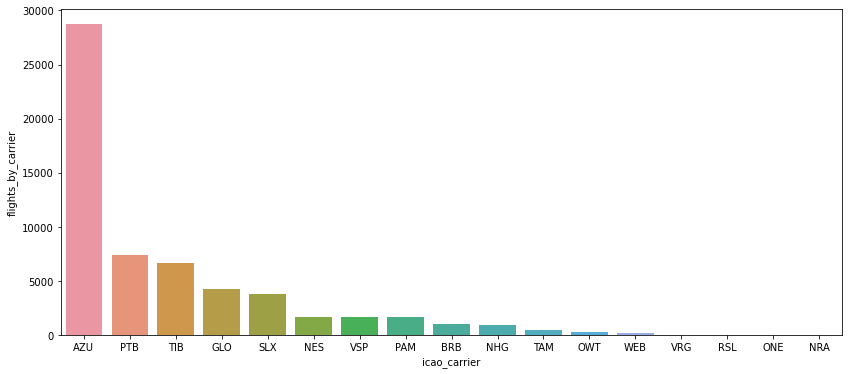

In [31]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x = "icao_carrier", y = "flights_by_carrier", ax=ax, data=flights_by_carrier);

In [32]:
flights_by_year = different_state_regional.groupby('sched_year').agg(
    icao_carriers=('icao_carrier',lambda x: x.nunique()),
    nr_flights=('icao_carrier','count'),
).sort_values(by='sched_year', ascending=False).reset_index()

In [33]:
flights_by_year

,sched_year,icao_carriers,nr_flights
0,2021,3,987
1,2020,4,1531
2,2019,6,4944
3,2018,7,4965
4,2017,4,4665
5,2016,4,4999
6,2015,5,10269
7,2014,4,6392
8,2013,6,6580
9,2012,5,1597


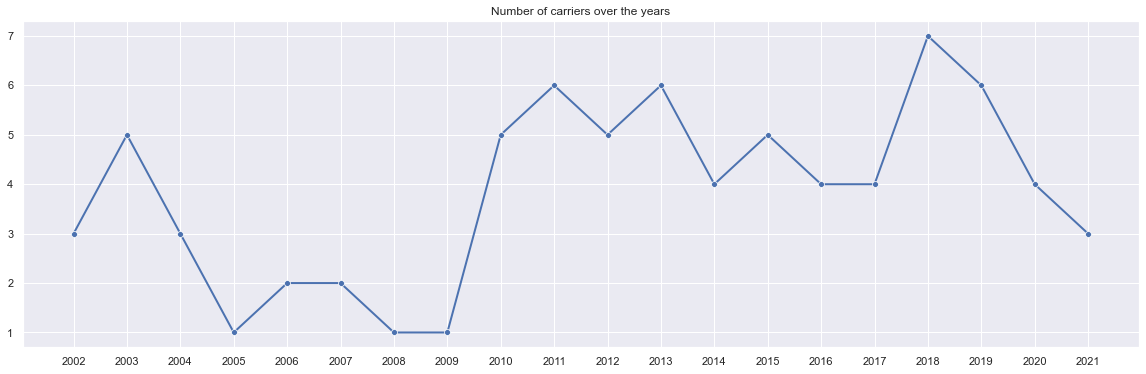

In [34]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data=flights_by_year, x="sched_year", y="icao_carriers", ax=ax, dashes=False, linewidth=2, marker="o")
ax.set(xticks=flights_by_year.sched_year.values)
ax.set(title='Number of carriers over the years')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show();

In [35]:
# last 5 years

In [36]:
last_5y = [2021,2020,2019,2018,2017,2016]

In [58]:
diff_state_last_5y = different_state_regional[
    different_state_regional.sched_year.isin(last_5y) == True
]

In [59]:
diff_state_last_5y

,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,total_pax,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest
4817519,PAM,7M,5953,4,SBTB,TMT,Trombetas,Oriximiná,PA,1,2016-09-27,2016,9,27,18:41:00,2016-09-27,2016,9,27,2,SETEMBRO,SWPI,PIN,Júlio Bélem,Parintins,AM,1,19:09:00,2016-09-27,2016,9,27,AT72,AEROSPATIALE/ALENIA ATR 72 201/202,388.0,6494,138.0,0.47,293.82,66,13,0,13,121,0,0.0,0.0,0.0,1096.0,0.0,0,0,0,16698,0,9108,1794,896,896,5953_4,SBTB-SWPI,TMT-PIN,-1.4897,-56.3969,8,-2.6694,-56.7711,8
4817520,PAM,7M,5953,4,SBTB,TMT,Trombetas,Oriximiná,PA,1,2016-09-25,2016,9,25,18:36:00,2016-09-25,2016,9,25,7,SETEMBRO,SWPI,PIN,Júlio Bélem,Parintins,AM,1,19:06:00,2016-09-25,2016,9,25,AT43,AEROSPATIALE/ALENIA ATR 42-300 / 320,349.0,4097,138.0,0.50,276.19,48,21,0,21,350,0,0.0,0.0,0.0,1925.0,0.0,0,0,0,48300,0,6624,2898,565,565,5953_4,SBTB-SWPI,TMT-PIN,-1.4897,-56.3969,8,-2.6694,-56.7711,8
4817521,PAM,7M,5953,4,SBTB,TMT,Trombetas,Oriximiná,PA,1,2016-09-18,2016,9,18,18:43:00,2016-09-18,2016,9,18,7,SETEMBRO,SWPI,PIN,Júlio Bélem,Parintins,AM,1,19:12:00,2016-09-18,2016,9,18,AT43,AEROSPATIALE/ALENIA ATR 42-300 / 320,345.0,4097,138.0,0.48,287.70,48,7,0,7,95,0,0.0,0.0,0.0,620.0,0.0,0,0,0,13110,0,6624,966,565,565,5953_4,SBTB-SWPI,TMT-PIN,-1.4897,-56.3969,8,-2.6694,-56.7711,8
4817522,PAM,7M,5953,4,SBTB,TMT,Trombetas,Oriximiná,PA,1,2016-09-15,2016,9,15,18:50:00,2016-09-15,2016,9,15,4,SETEMBRO,SWPI,PIN,Júlio Bélem,Parintins,AM,1,19:22:00,2016-09-15,2016,9,15,AT72,AEROSPATIALE/ALENIA ATR 72 201/202,363.0,6494,138.0,0.53,260.56,66,7,0,7,56,0,0.0,0.0,250.0,831.0,0.0,0,34500,0,7728,0,9108,966,896,896,5953_4,SBTB-SWPI,TMT-PIN,-1.4897,-56.3969,8,-2.6694,-56.7711,8
4817523,PAM,7M,5953,4,SBTB,TMT,Trombetas,Oriximiná,PA,1,2016-09-11,2016,9,11,18:43:00,2016-09-11,2016,9,11,7,SETEMBRO,SWPI,PIN,Júlio Bélem,Parintins,AM,1,19:16:00,2016-09-11,2016,9,11,AT43,AEROSPATIALE/ALENIA ATR 42-300 / 320,350.0,4097,138.0,0.55,251.08,48,13,0,13,197,0,0.0,0.0,0.0,1172.0,0.0,0,0,0,27186,0,6624,1794,565,565,5953_4,SBTB-SWPI,TMT-PIN,-1.4897,-56.3969,8,-2.6694,-56.7711,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837457,AZU,AD,2491,1,SBMO,MCZ,Zumbi Dos Palmares,Rio Largo,AL,2,2021-08-01,2021,8,1,09:03:00,2021-08-01,2021,8,1,7,AGOSTO,SBCY,CGB,Marechal Rondon,Várzea Grande,MT,3,12:23:00,2021-08-01,2021,8,1,A20N,AIRBUS A320NEO,8545.0,15288,2308.0,3.33,692.40,174,154,0,154,1256,26,0.0,0.0,0.0,12832.0,0.0,0,0,0,2898850,60008,401592,355432,35284,35284,2491_1,SBMO-SBCY,MCZ-CGB,-9.5108,-35.7917,4,-15.6500,-56.1175,4
7837513,AZU,AD,2445,1,SBMO,MCZ,Zumbi Dos Palmares,Rio Largo,AL,2,2021-08-07,2021,8,7,20:33:00,2021-08-07,2021,8,7,6,AGOSTO,SBRP,RAO,Leite Lopes,Ribeirão Preto,SP,4,23:21:00,2021-08-07,2021,8,7,A20N,AIRBUS A320NEO,7165.0,18525,1821.0,2.80,650.35,174,152,4,156,1336,42,0.0,0.0,0.0,13078.0,7284.0,0,0,0,2432860,76482,316854,276792,33734,33734,2445_1,SBMO-SBRP,MCZ-RAO,-9.5108,-35.7917,4,-21.1364,-47.7767,6
7837519,AZU,AD,2565,1,SBPS,BPS,Porto Seguro,Porto Seguro,BA,2,2021-08-21,2021,8,21,15:04:00

In [60]:
diff_state_last_5y.route_icao.nunique()

100

In [61]:
flights_5y = diff_state_last_5y.groupby('icao_carrier').agg(
    nr_of_routes=('route_icao',lambda x: x.nunique()),
    paid_pax=('seats_sold','sum'),
    total_pax=('total_pax','sum'),
    flights_by_carrier=('icao_carrier','count')
).sort_values(by='flights_by_carrier', ascending=False).reset_index()

In [62]:
route_percentage = round((flights_5y['nr_of_routes'] / flights_5y['nr_of_routes'].sum()) * 100, 2)
ratio_free_pax = round(((flights_5y.total_pax - flights_5y.paid_pax) / flights_5y.total_pax) * 100, 2)
flight_percentage = round((flights_5y['flights_by_carrier'] / flights_5y['flights_by_carrier'].sum()) * 100, 2)
mean_paid_pax_by_fligth = round(flights_5y['paid_pax'] / flights_5y['flights_by_carrier'], 2)

In [63]:
flights_5y.insert(loc=2, column='route_percentage', value=route_percentage)
flights_5y.insert(loc=5, column='ratio_free_pax', value=ratio_free_pax)
flights_5y.insert(loc=7, column='flight_percentage', value=flight_percentage)
flights_5y.insert(loc=8, column='mean_paid_pax_by_fligth', value=mean_paid_pax_by_fligth)

In [64]:
flights_5y

,icao_carrier,nr_of_routes,route_percentage,paid_pax,total_pax,ratio_free_pax,flights_by_carrier,flight_percentage,mean_paid_pax_by_fligth
0,AZU,60,55.05,1390666,1408687,1.28,16966,76.80,81.97
1,PTB,18,16.51,114685,116147,1.26,3353,15.18,34.20
2,PAM,7,6.42,17583,17706,0.69,922,4.17,19.07
3,GLO,2,1.83,59957,61354,2.28,569,2.58,105.37
4,OWT,16,14.68,576,576,0.00,274,1.24,2.10
5,TAM,3,2.75,590,597,1.17,4,0.02,147.50
6,ONE,3,2.75,398,398,0.00,3,0.01,132.67


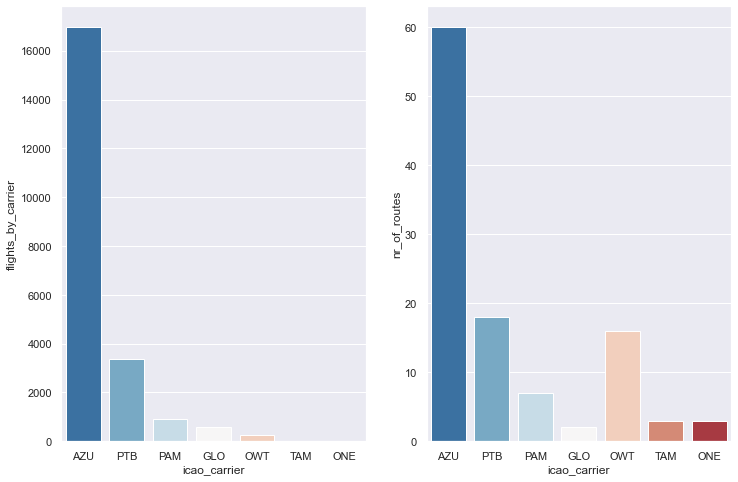

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

sns.barplot(x='icao_carrier', y='flights_by_carrier', data=flights_5y, ax=ax[0], palette='RdBu_r')
sns.barplot(x='icao_carrier', y='nr_of_routes', data=flights_5y, ax=ax[1], palette='RdBu_r');

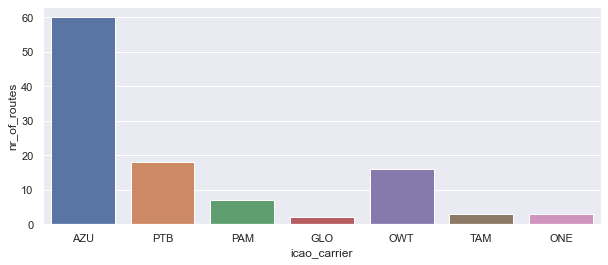

In [46]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x = "icao_carrier", y = "nr_of_routes", ax=ax, data=flights_5y);

In [47]:
carrier_plot = diff_state_last_5y.groupby(['icao_carrier', 'sched_year', 'sched_month']).agg(
    paid_pax=('seats_sold','sum'),
    total_pax=('total_pax','sum'),
    route_nr=('route_icao',lambda x: x.nunique()),
    flights_by_carrier=('icao_carrier','count')
).sort_values(by='icao_carrier', ascending=True).reset_index()

In [48]:
carrier_plot

,icao_carrier,sched_year,sched_month,paid_pax,total_pax,route_nr,flights_by_carrier
0,AZU,2016,1,22918,23309,21,342
1,AZU,2018,11,25364,25723,22,324
2,AZU,2018,12,29608,29975,26,342
3,AZU,2019,1,31392,31728,27,356
4,AZU,2019,2,25501,25836,27,305
...,...,...,...,...,...,...,...
227,PTB,2018,3,1916,1928,6,81
228,PTB,2017,3,3613,3641,4,99
229,TAM,2018,7,139,141,1,1
230,TAM,2018,5,128,133,1,1


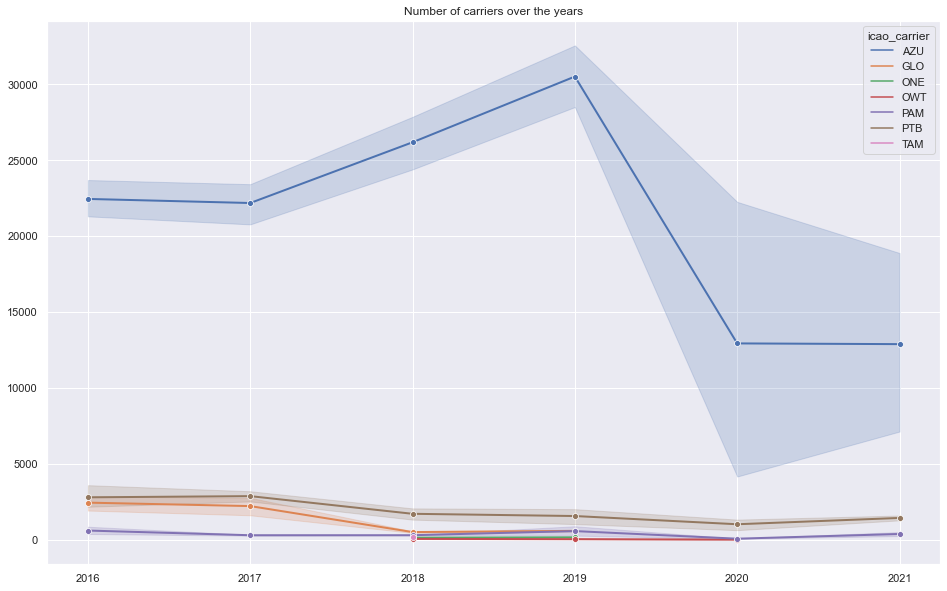

In [49]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(16,10))

sns.lineplot(data=carrier_plot, x="sched_year", y="total_pax", ax=ax, hue='icao_carrier', linewidth=2, marker="o")
# ax.set(xticks=flights_by_year.sched_year.values)
ax.set(title='Number of carriers over the years')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show();

In [50]:
flights_5y = diff_state_last_5y.groupby('sched_year').agg(
    icao_carriers=('icao_carrier',lambda x: x.nunique()),
    nr_flights=('icao_carrier','count')
).sort_values(by='sched_year', ascending=False).reset_index()

In [51]:
flights_5y

,sched_year,icao_carriers,nr_flights
0,2021,3,987
1,2020,4,1531
2,2019,6,4944
3,2018,7,4965
4,2017,4,4665
5,2016,4,4999


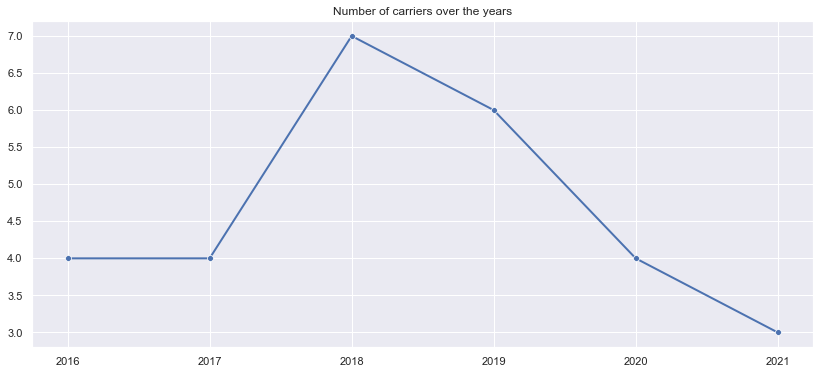

In [52]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(data=flights_5y, x="sched_year", y="icao_carriers", ax=ax, dashes=False, linewidth=2, marker="o")
# ax.set(xticks=flights_by_year.sched_year.values)
ax.set(title='Number of carriers over the years')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show();